In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [4]:
df=pd.read_csv('/content/spotify_millsongdata.csv',engine='python')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [5]:
df.shape

(57650, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [7]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [9]:
top_artists=df['artist'].value_counts().head(10)
print("The top 10 artists are: ")
print(top_artists)

The top 10 artists are: 
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [10]:
df=df.sample(10000)
df=df.drop('link',axis=1).reset_index(drop=True)
df.head()

,artist,song,text
0,Ugly Kid Joe,Goddamn Devil,"Rape, D.U.I., assault and battery \r\nThese a..."
1,Roxette,She Doesn't Live Here Anymore,"We grew up together, \r\nwe've been here fore..."
2,Devo,Sexi Luv,Remember luv \r\nSexi luv \r\nIts a breath o...
3,Bing Crosby,How Lovely Is Christmas,How lovely is Christmas \r\nWith boughs in th...
4,Robbie Williams,Happy Song,Let's all make babies \r\nAnd salsa from Sain...


In [11]:
df.shape

(10000, 3)

In [14]:
all_lyrics=" ".join(df['text'].dropna())
wordcloud=WordCloud(width=800,height=400,background_color="white").generate(all_lyrics)

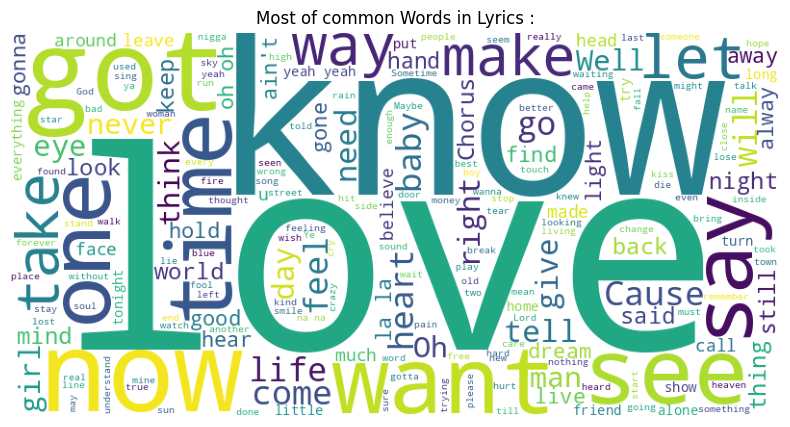

In [16]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most of common Words in Lyrics :")
plt.show()

In [17]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
def data_cleaning(text):
  text=re.sub(r"[^a-zA-Z\s]","",text)
  text=text.lower()
  tokens=word_tokenize(text)
  tokens=[word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [25]:
df['cleaned_text']=df['text'].apply(data_cleaning)

In [26]:
df.head()

,artist,song,text,cleaned_text
0,Ugly Kid Joe,Goddamn Devil,"Rape, D.U.I., assault and battery \r\nThese a...",rape dui assault battery things bring murder t...
1,Roxette,She Doesn't Live Here Anymore,"We grew up together, \r\nwe've been here fore...",grew together weve forever barefoot summer col...
2,Devo,Sexi Luv,Remember luv \r\nSexi luv \r\nIts a breath o...,remember luv sexi luv breath fresh air day sun...
3,Bing Crosby,How Lovely Is Christmas,How lovely is Christmas \r\nWith boughs in th...,lovely christmas boughs hall bells ringle jing...
4,Robbie Williams,Happy Song,Let's all make babies \r\nAnd salsa from Sain...,lets make babies salsa sainsburys cause happy ...


In [27]:
tfidf_vec=TfidfVectorizer(max_features=5000)
tfidf_matrix=tfidf_vec.fit_transform(df['cleaned_text'])

In [29]:
cos_sin=cosine_similarity(tfidf_matrix,tfidf_matrix)

In [34]:
def recomm_song(song_name, cos_sin=cos_sin, df=df, top_n=5):
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found"
    idx = idx[0]

    sim_score = list(enumerate(cos_sin[idx]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    sim_score = sim_score[1:top_n+1]

    song_indices = [i[0] for i in sim_score]
    return df[['artist', 'song']].iloc[song_indices]


In [35]:
df['song'][2]

'Sexi Luv'

In [36]:
print(" We Recommendate You this songs next: ")
recom=recomm_song('Sexi Luv')
print(recom)

 We Recommendate You this songs next: 
              artist                      song
7544       LL Cool J               Papa Luv It
9465     Vybz Kartel  Push It In (take It Out)
4116         Ramones            I Remember You
5910  Gloria Estefan     Remember Me With Love
6914     John Denver            I Remember You
